# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#************************************************************
#**                         Module 6 Challenge             **
#**                                                        **
#** Part I: I'll create a Python script to visualize the   **
#** weather of over 500 cities of varying distances from   **
#** the equator. citipy Python library and OpenWeatherMap  **
#** API will be used to accomplish this.                   **
#**                                                        **
#** Last edits: 4/1/2024, by Justin Bein                   **
#************************************************************

In [22]:
#************************************
#** Dependencies and Setup section **
#************************************

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
#*********************************************************
#** Create empty lists:                                 **
#** 1. To hold the latitude and longitude combinations. **
#** 2. To hold the city names.                          **
#*********************************************************
lat_lngs = []
cities = []


#***********************************************
#** Create ranges for latitude and longitude **
#***********************************************

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

#***************************************************************
#** Create set of random latitude and longitude combinations. **
#***************************************************************

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)      #zip the the lists together 


#***********************************************************************
#** identify the nearest city for each latitude/longitude combinaion. **
#***********************************************************************

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#*************************************************
#**            Data Retrieval section.
#**                                             **
#** In this section the OpenWeatherMap API will **
#** be used to retrieve data for each of the    **
#** cities in the list created in the previous  **
#** step. Then, data elements, e.g., humidity,  **
#** temperature, etc., will be extracted and    **
#** appended to blank lists. Those lists will be**
#** used to create various plots.               **
#**                                             **
#*************************************************

# Set the API base URL
url_1 = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"  #use this variable in case it's decided to use  different unit of measurement.
query_url_2 = url_1 + "appid=" + weather_api_key + "&units=" + units+ "&q="

#***************************************************
#** Define an empty list to hold the weather data **
#** for each city.                                **
#***************************************************

city_data = []

#***********************************************
#** create a visual prompt to notify the user **
#** that processing has begun.                **
#***********************************************

print("Beginning Data Retrieval     ")
print("-----------------------------")


#***********************************************
#** create counters to step through the data  **
#** and to notify the user of the progress.   **
#***********************************************

record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
     # Group cities in sets of 50 for logging purposes
     if (i % 50 == 0 and i >= 50):
         set_count += 1
         record_count = 0

     # Create endpoint URL with each city
     city_url = query_url_2+city
    
     # Log the url, record, and set numbers
     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

     # Add 1 to the record count
     record_count += 1

     # Run an API request for each of the cities
     try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
             
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date    
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

         # If an error is experienced, skip the city
     except:
         print("City not found. Skipping...")
         pass

#***********************************************
#** notify the user that the data acquisition **
#** process is complete.                      **
#***********************************************

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | byron bay
Processing Record 7 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | tromso
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | kendari
Processing Record 14 of Set 1 | labuan
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | bouar
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | hawaiian paradise p

In [5]:
#*******************************************************
#**                 Results Checking Section          **
#** 1. convert the cities weather data to a DataFrame **
#** 2. count the number of rows in the DataFrame      **
#** 3. display sample data                            **
#**                                                   **
#*******************************************************

city_data_df=pd.DataFrame(city_data)

In [6]:
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [7]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,23.38,58,41,4.54,RO,1711986893
1,udachny,66.4167,112.4000,-7.14,94,99,6.58,RU,1711987038
2,albany,42.6001,-73.9662,8.86,64,100,0.45,US,1711987038
3,bethel,41.3712,-73.4140,10.32,57,100,1.54,US,1711986872
4,blackmans bay,-43.0167,147.3167,15.41,93,100,0.45,AU,1711987039


In [8]:
#*********************************************
#** export the city_data_df into a CSV file **
#*********************************************

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
#**********************************************************
#**                 Results Checking Section             **
#** 1. read the CSV file I exported in the previous step **
#** 2. display sample data                               **
#**********************************************************

city_data_df =pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,23.38,58,41,4.54,RO,1711986893
1,udachny,66.4167,112.4000,-7.14,94,99,6.58,RU,1711987038
2,albany,42.6001,-73.9662,8.86,64,100,0.45,US,1711987038
3,bethel,41.3712,-73.4140,10.32,57,100,1.54,US,1711986872
4,blackmans bay,-43.0167,147.3167,15.41,93,100,0.45,AU,1711987039


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

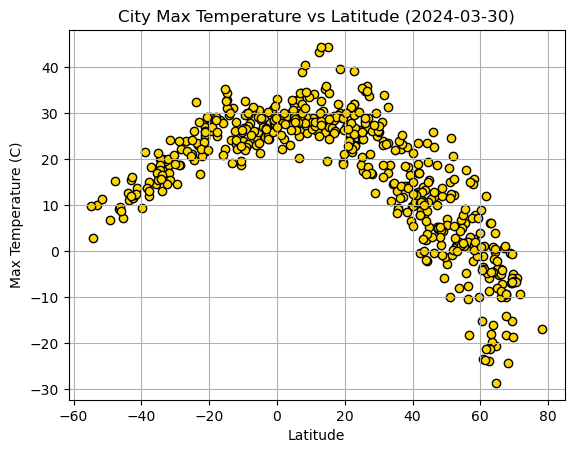

In [10]:
#***********************************************************
#** create a scatter plot of latitude vs. max temperature **
#***********************************************************

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker = "o", edgecolor='black', facecolor='gold')
plt.title("City Max Temperature vs Latitude (2024-03-30)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

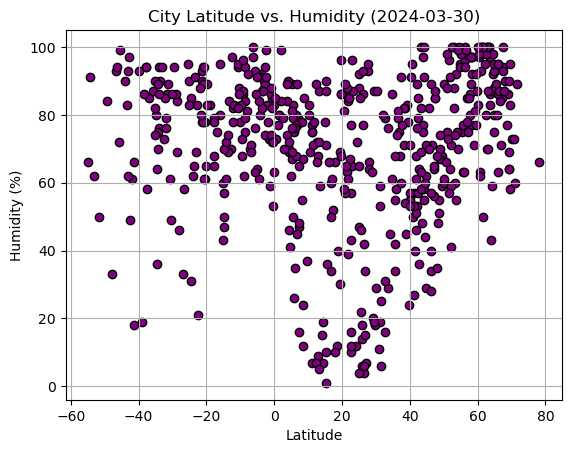

In [11]:
#****************************************************
#** create a scatter plot of latitude vs. humidity **
#****************************************************

#build a scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker = "o", edgecolor='black', facecolor='purple')
plt.title("City Latitude vs. Humidity (2024-03-30)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

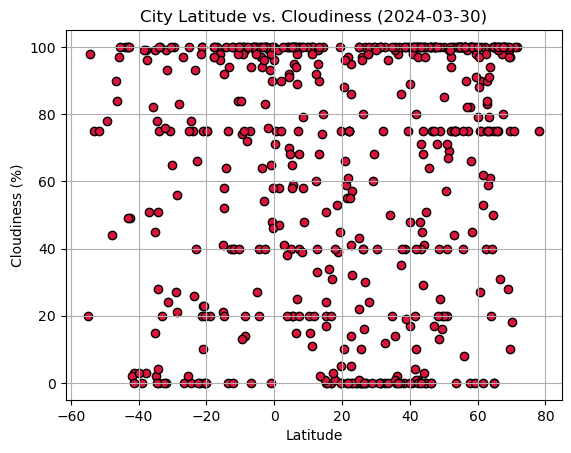

In [12]:
#******************************************************
#** create a scatter plot of latitude vs. cloudiness **
#******************************************************

plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker = "o", edgecolor='black', facecolor='crimson')
plt.title("City Latitude vs. Cloudiness (2024-03-30)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

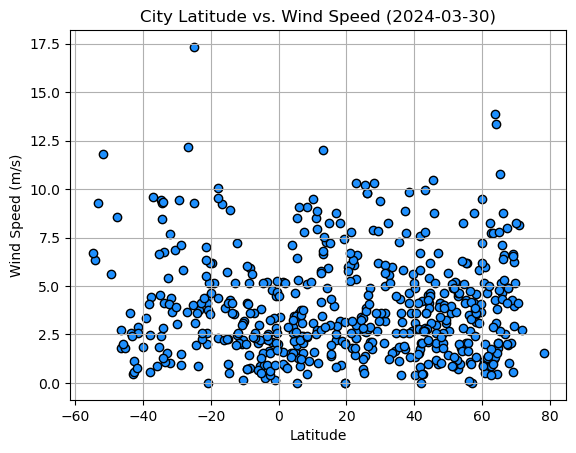

In [13]:
#******************************************************
#** create a scatter plot of latitude vs. wind speed **
#******************************************************

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker = "o", edgecolor='black', facecolor='dodgerblue')
plt.title("City Latitude vs. Wind Speed (2024-03-30)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
#*********************************************************
#** define a function to create linear regression plots **
#** 1. pass x-values and y-values                       **
#** 2. pass x-axis label and y-axis label               **
#** 3. pass the plot title                              **
#** 4. pass the coordinates for displaying the equation ** 
#**    of the regression line.                          **
#*********************************************************

def linear_regression_plot(x_values, y_values, x_axis_label,y_axis_label, plot_title, plot_coordinates):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, color="lightsteelblue")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, plot_coordinates, fontsize=15, color="red")
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(plot_title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [15]:
#***********************************************************************
#** create dataframes containing northern and southern hemisphere data**
#***********************************************************************

#** northern hemisphere data (latitude >=0)
condition = city_data_df['Lat']>=0
northern_hemi_df = city_data_df[condition]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,23.38,58,41,4.54,RO,1711986893
1,udachny,66.4167,112.4000,-7.14,94,99,6.58,RU,1711987038
2,albany,42.6001,-73.9662,8.86,64,100,0.45,US,1711987038
3,bethel,41.3712,-73.4140,10.32,57,100,1.54,US,1711986872
8,tromso,69.6496,18.9570,-4.99,58,75,5.14,NO,1711987040


In [16]:
#** southern hemisphere data (latitude >=0)
condition = city_data_df['Lat'] <0
southern_hemi_df = city_data_df[condition]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,blackmans bay,-43.0167,147.3167,15.41,93,100,0.45,AU,1711987039
5,byron bay,-28.6500,153.6167,18.73,84,21,0.91,AU,1711987039
6,waitangi,-43.9535,-176.5597,12.68,90,100,3.63,NZ,1711987039
7,port-aux-francais,-49.3500,70.2167,6.83,84,78,5.62,TF,1711987039
10,port lincoln,-34.7333,135.8667,16.07,80,2,9.42,AU,1711987040


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8765965238942588


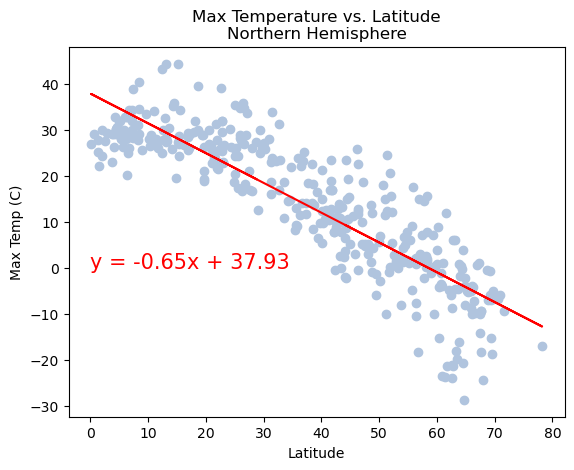

In [24]:
#*********************************************************
#** create linear regression plots for each hemisphere: **  
#**                                                     **
#** Northern Hemisphere                                 **
#** 1. max temperature vs latitude                      **
#** 2. humidity vs latitude                             **
#** 3. cloudiness vs latitude                           **
#** 4. wind speed vs. latitude                          **
#**                                                     **
#** Southern Hemisphere                                 **
#** 5. max temperature vs latitude                      **
#** 6. humidity vs latitude                             **
#** 7. cloudiness vs latitude                           **
#** 8. wind speed vs. latitude                          **
#**                                                     **
#*********************************************************

#*********************************************
#** calling the linear regreession function **
#*********************************************

linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],'Latitude','Max Temp (C)','Max Temperature vs. Latitude\nNorthern Hemisphere',(0,0))


The r-value is: 0.8267545580740465


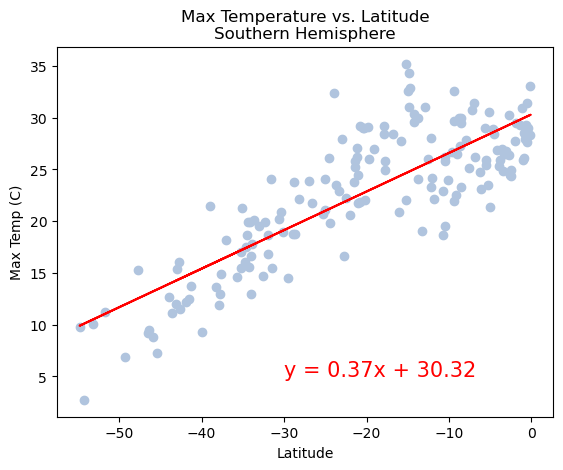

In [25]:
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],'Latitude','Max Temp (C)','Max Temperature vs. Latitude\nSouthern Hemisphere',(-30,5))


**Discussion about the linear relationship:** YOUR RESPONSE HERE
#
# the two preceding plots display the maximum temperature and latitude of each city, and linear regression is calculated
# for the purpose of determining whether a relationship exists between max temp and latitude. The results indicate that
# for cities in both hemispheres there exists a strong relationship between the two:
# In the northern hemisphere, as the latitude increases (that is, angular distance north of the equator), the maximum temperature decreases.
# This has intuitive appeal: increasing latitude is closer to the north pole.
# Similarly, in the southern hemisphere, as the latitude increaes (the angular distance south of the equator) the maximum temperature increases.
# This too has intuitive appeal: When traversing the globe from -90 degrees to 0 degrees, one moves from the south pole to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3525830296702815


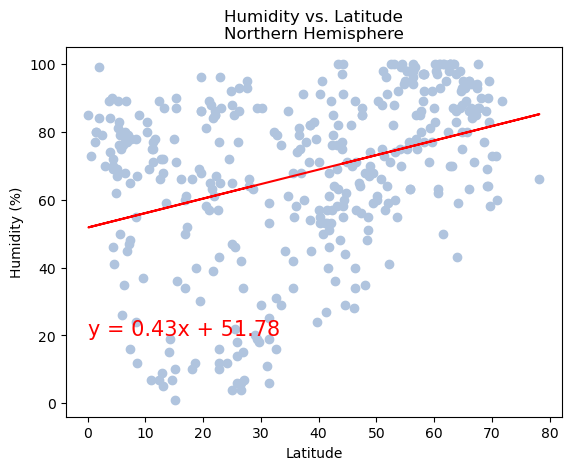

In [33]:
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],'Latitude','Humidity (%)','Humidity vs. Latitude\nNorthern Hemisphere',(0,20))

The r-value is: 0.14736880486148493


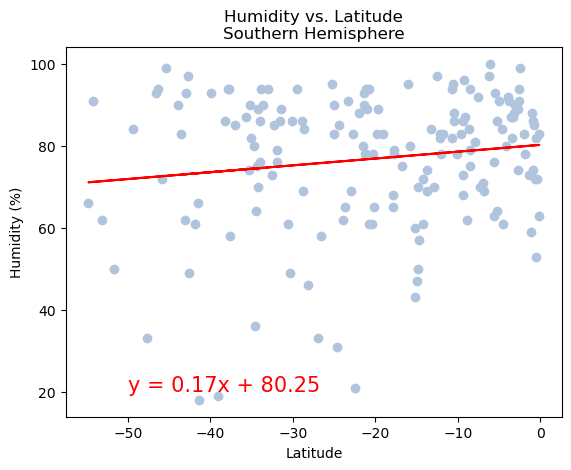

In [34]:
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],'Latitude','Humidity (%)','Humidity vs. Latitude\nSouthern Hemisphere',(-50,20))

**Discussion about the linear relationship:**
# the two preceding plots display the humidity and latitude of each city, and linear regression is calculated
# for the purpose of determining whether a relationship exists between humidity and latitude.
# In the northern hemisphere, there appears to be a relationship, albeit slight, between humidity and latitude. The relationhship isn't strong, however: The correlation coefficient (R value) # of 0.35 suggests humidity is somewhat correlated with latitude. As latitude increases, the humidity will increase too.
# In the southern hemisphere, the results are not nearly as strong: The correlation coefficient of 0.147 indicates a weak relationship between latitude and humidity. That is, as latitude #increases, humidity increases too, but only slightly.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1917601110152571


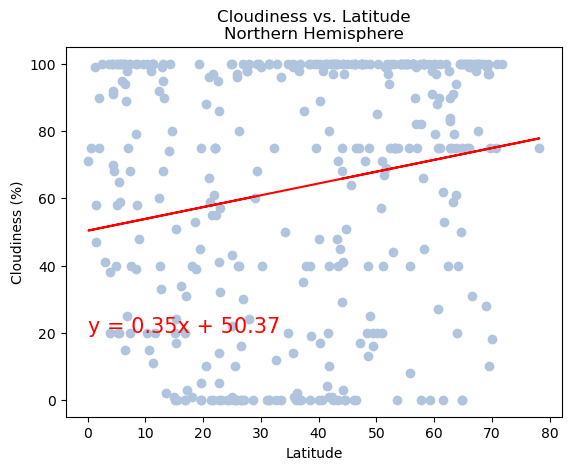

In [35]:
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)','Cloudiness vs. Latitude\nNorthern Hemisphere',(0,20))

The r-value is: 0.1987343931869806


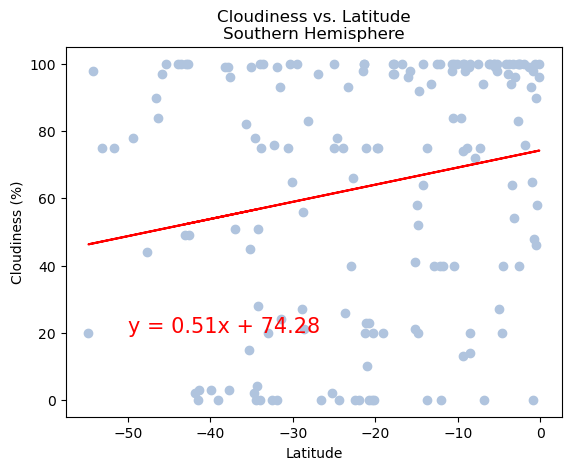

In [36]:
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)','Cloudiness vs. Latitude\nSouthern Hemisphere',(-50,20))

**Discussion about the linear relationship:**
# the two preceding plots display the cloudiness and latitude of each city, and linear regression is calculated
# for the purpose of determining whether a relationship exists between the two.
# In the northern hemisphere, the scatterplot itself doesn't suggest a relationship between the two. The correlation coefficient (R value) # of 0.191 suggests humidity is slightly correlated #with latitude. As latitude increases, cloudiness will increase. 
# In the southern hemisphere, the scatterplot itself doesn't suggest a relationship between the two . The correlation coefficient (R value) # of 0.198 suggests humidity is slightly #correlated with latitude. As latitude increases, cloudiness will increase.
# Note: it could be the case that these correlations vary by season.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009951317118176851


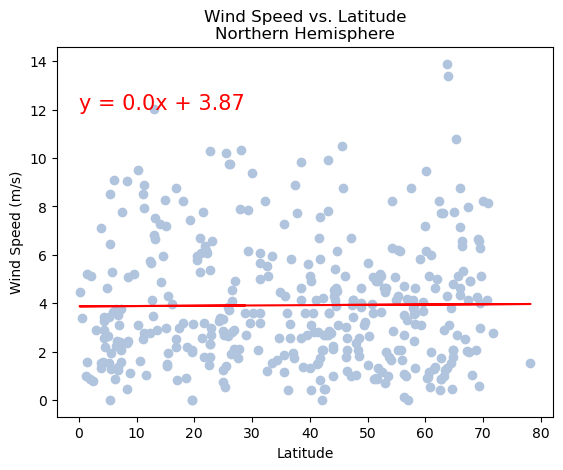

In [37]:
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)','Wind Speed vs. Latitude\nNorthern Hemisphere',(0,12))

The r-value is: -0.26895033875099356


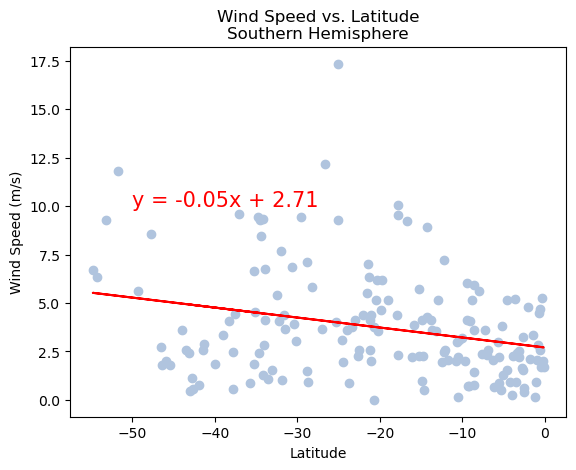

In [38]:
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)','Wind Speed vs. Latitude\nSouthern Hemisphere',(-50,10))

**Discussion about the linear relationship:**
# the two preceding plots display the wind speed  and latitude of each city, and linear regression is calculated
# for the purpose of determining whether a relationship exists between the two.
# In the northern hemisphere, both the scatterplot and the correlation coefficient indicate there's no correlation between the two variables, at least not at this time (this could be a #seasonal phenomenon). 
# In the southern hemisphere, however, the scatterplot itself suggest a relationship between the two . The correlation coefficient (R value) # of -0.26895 suggests wind speed is slightly #correlated with latitude. As latitude increases, windspeed will decrease.